<a href="https://colab.research.google.com/github/arobiddin/data_scince_ls_works/blob/main/k_NN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning. 

# Classification
## k-NN

# Diabet kasallagiga tashxis qo’yish.

**Tavsif:**
Quyidagi ma’lumotlar to’plami Hindistonning Qandli diabet va buyrak kasalliklari milliy institutidan olingan. Maqsad diagnostik o’lchovlar asosida bemorda diabet bor-yo’qligini taxmin qilishdir.

In [1]:
import pandas as pd
import numpy as np
import sklearn as skl# scikit-learn kutubxonasi
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
url="https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv"
df = pd.read_csv(url)
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
22,7,196,90,0,0,39.8,0.451,41,1
276,7,106,60,24,0,26.5,0.296,29,1
33,6,92,92,0,0,19.9,0.188,28,0
485,0,135,68,42,250,42.3,0.365,24,1
546,5,187,76,27,207,43.6,1.034,53,1
343,5,122,86,0,0,34.7,0.290,33,0
603,7,150,78,29,126,35.2,0.692,54,1
719,5,97,76,27,0,35.6,0.378,52,1
121,6,111,64,39,0,34.2,0.260,24,0
128,1,117,88,24,145,34.5,0.403,40,1


**Ustunlar:**



*   Pregnancies: homilador bo’lish soni
*   Glucose: glyukozaga test natijasi
*   BloodPressure: diastolik qon bosimi (mm Hg)
*   SkinThickness: Triceps teri burmasining qalinligi (mm)
*   Insulin: 2 soatlik sarum insulini (mu U/ml)
*   BMI: Tana massasi indeksi (vazn kg / (m bo’yi) ^ 2)
*   DiabetesPedigreeFunction: diabetning naslchilik funktsiyasi
*   Age: Yosh (yil)
*   Outcome: Class (0 – diabet yo’q, 1 – diabet)

## Ma'lumotlarni Machine Learning uchun tayyorlash

In [125]:
df.shape


(403, 9)

In [126]:
sum(df.duplicated())


0

In [127]:
df['Outcome'].value_counts()

0    264
1    139
Name: Outcome, dtype: int64

In [128]:
inx = df[df['SkinThickness']==0.0].iloc[35:]#) & (df['Outcome']==0)
df.drop(index=inx.index, inplace=True)
df.dropna(inplace=True)

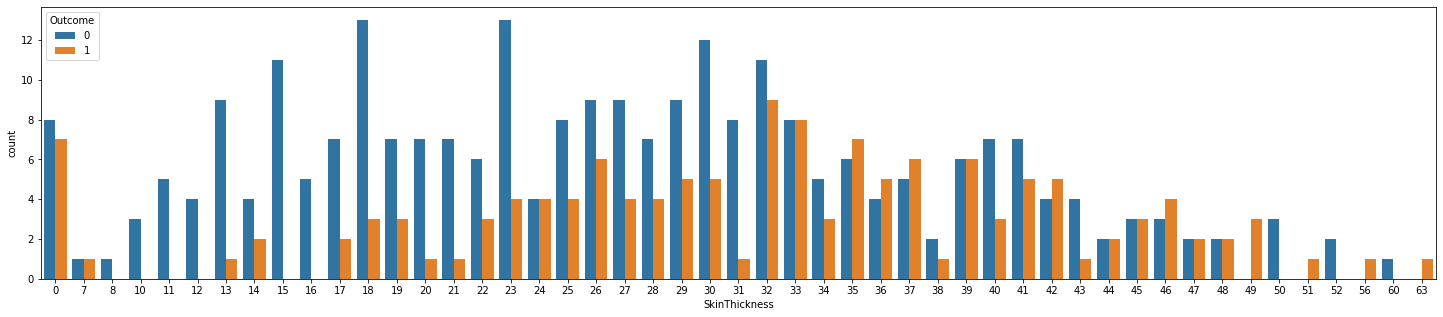

In [129]:
plt.figure(figsize=(25,5))
sns.countplot(x="SkinThickness", hue='Outcome', data=df)
plt.show()

In [130]:
df['Outcome'].value_counts()

0    264
1    139
Name: Outcome, dtype: int64

In [131]:
inx = df[df['Insulin']==0.0].iloc[20:]#) & (df['Outcome']==0)
df.drop(index=inx.index, inplace=True)
df.dropna(inplace=True)

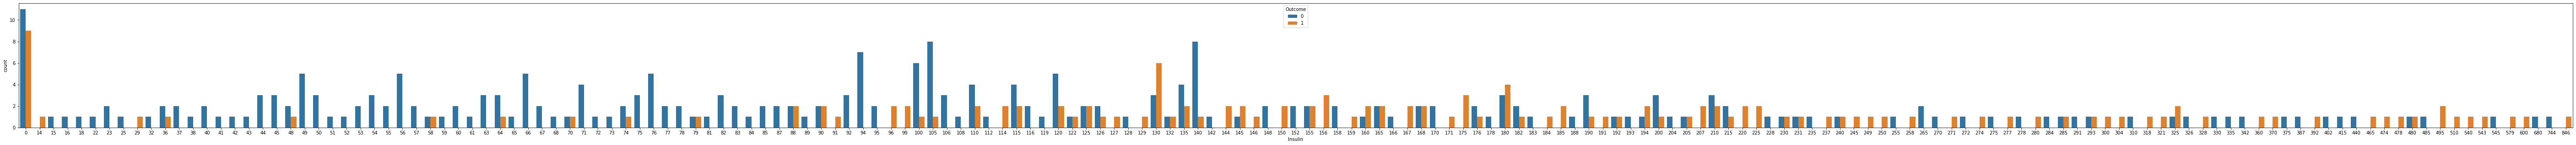

In [132]:
plt.figure(figsize=(100,5))
sns.countplot(x="Insulin", hue='Outcome', data=df)
plt.show()

In [133]:
df['Outcome'].value_counts()

0    264
1    139
Name: Outcome, dtype: int64

In [134]:
inx1 = df[(df['Glucose']==126.0) & (df['Outcome']==0)].iloc[6:]
inx2 = df[(df['Glucose']==99.0) & (df['Outcome']==0)].iloc[6:]
inx3 = df[(df['Glucose']==100.0) & (df['Outcome']==0)].iloc[6:]
df.drop(index=inx1.index, inplace=True)
df.drop(index= inx2.index, inplace=True)
df.drop(index= inx3.index, inplace=True)
df.dropna(inplace=True)

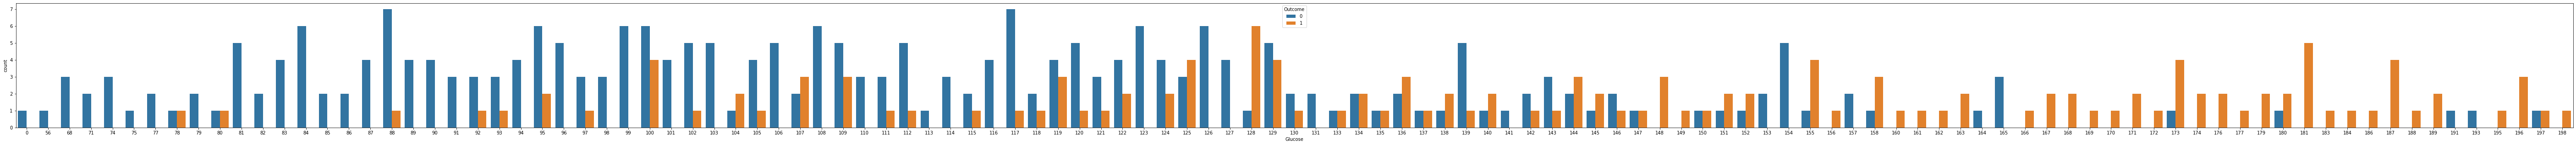

In [135]:
plt.figure(figsize=(100,5))
sns.countplot(x="Glucose", hue='Outcome', data=df)
plt.show()

In [136]:
df['Outcome'].value_counts()

0    264
1    139
Name: Outcome, dtype: int64

In [137]:
df.shape

(403, 9)

In [138]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.213069,0.179834,0.036364,0.003741,0.034756,0.010163,0.672454,0.263265
Glucose,0.213069,1.000000,0.189779,0.148438,0.534784,0.202674,0.142236,0.339498,0.507608
BloodPressure,0.179834,0.189779,1.000000,0.183478,0.079186,0.251752,0.020356,0.292002,0.160775
SkinThickness,0.036364,0.148438,0.183478,1.000000,0.262337,0.587964,0.158298,0.083553,0.193860
Insulin,0.003741,0.534784,0.079186,0.262337,1.000000,0.231907,0.137619,0.153583,0.262630
BMI,0.034756,0.202674,0.251752,0.587964,0.231907,1.000000,0.109635,0.056026,0.240905
DiabetesPedigreeFunction,0.010163,0.142236,0.020356,0.158298,0.137619,0.109635,1.000000,0.080373,0.184514
Age,0.672454,0.339498,0.292002,0.083553,0.153583,0.056026,0.080373,1.000000,0.337559
Outcome,0.263265,0.507608,0.160775,0.193860,0.262630,0.240905,0.184514,0.337559,1.000000


In [139]:
df.corrwith(df['Outcome']).abs().sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.507608
Age                         0.337559
Pregnancies                 0.263265
Insulin                     0.262630
BMI                         0.240905
SkinThickness               0.193860
DiabetesPedigreeFunction    0.184514
BloodPressure               0.160775
dtype: float64

In [140]:
#df = df.drop(['SkinThickness','BloodPressure','DiabetesPedigreeFunction','Insulin'], axis=1)

In [141]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome']


In [142]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

# ML

In [143]:
# Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=71)

# k-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9) # k-ni qiymati

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [144]:
y_predict = knn.predict(X_test)

**Baholash**

**Jaccard index**

In [145]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predict)

0.5588235294117647

### Confusion matrix

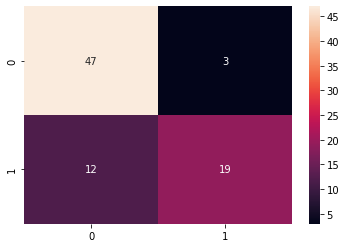

In [146]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [147]:
confusion_matrix(y_test, y_predict)

array([[47,  3],
       [12, 19]])

In [148]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print(f"precision={precision}\nrecall={recall}\nf1={f1}\naccuracy={accuracy}")

precision=0.8636363636363636
recall=0.6129032258064516
f1=0.7169811320754716
accuracy=0.8148148148148148


In [149]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86        50
           1       0.86      0.61      0.72        31

    accuracy                           0.81        81
   macro avg       0.83      0.78      0.79        81
weighted avg       0.82      0.81      0.81        81



### Cross-validation yordamida tekshiramiz

In [150]:
# Cross validation
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 5)

# Modelni baholash
from sklearn.metrics import classification_report
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       264
           1       0.75      0.55      0.64       139

    accuracy                           0.78       403
   macro avg       0.77      0.73      0.74       403
weighted avg       0.78      0.78      0.77       403



#Eng yaxshi k ni topish

### `for` yordamida

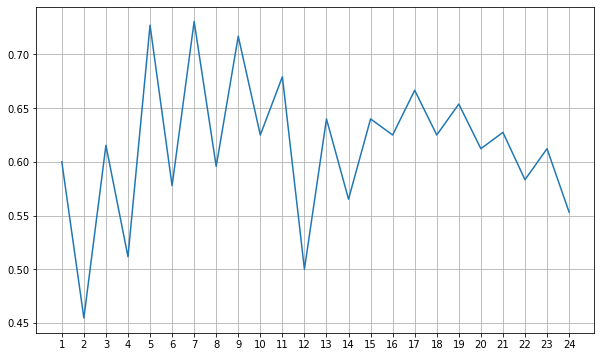

In [151]:
f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k) # k-ni qiymati
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

### Grid Search yordamida

In [152]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [153]:
knn_gscv.cv_results_['rank_test_score']

array([24, 23, 20, 20, 15, 22, 17, 19,  1, 12,  2,  6,  5, 11,  4,  8,  7,
       14,  9, 16,  3, 12, 18, 10], dtype=int32)

In [154]:
knn_gscv.best_params_

{'n_neighbors': 9}

In [155]:
knn_gscv.best_score_

0.7817901234567902

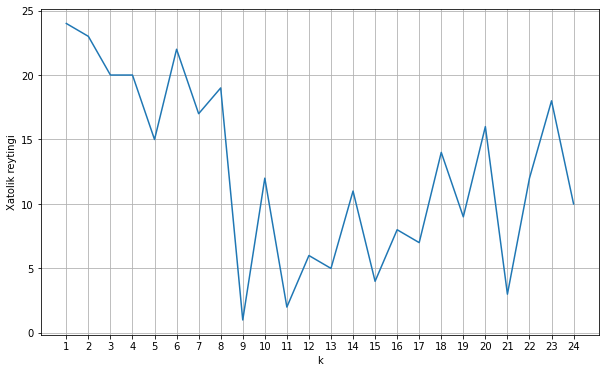

In [156]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()